In [1]:
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from ast import literal_eval
print(tf.__version__)
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

2.6.0


In [2]:
data = pd.read_csv('/Users/Giovass1/Esercitazione/genresbyPoster/train.csv')
data.shape


(7254, 27)

In [3]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '//Users/Giovass1/Esercitazione/genresbyPoster/Movies-Poster_Dataset-master/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:32<00:00, 225.12it/s]


In [5]:
X.shape

(7254, 350, 350, 3)

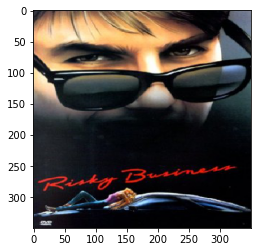

In [6]:
plt.imshow(X[8])

In [7]:
data['Genre'][88]


"['Drama', 'Sport']"

In [8]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape


(7254, 25)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

X_train[0].shape

(350, 350, 3)

In [10]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))
model.summary()

2021-09-30 15:27:28.844493: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [11]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,batch_size=20, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
  3/309 [..............................] - ETA: 8:48 - loss: 0.1554 - accuracy: 0.5667 

KeyboardInterrupt: 

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predict_x=model.predict(X_test)
predictions=np.argmax(predict_x,axis=1)

newy = y_test.astype(int)

newts=np.argmax(newy, axis=1)
print(classification_report(newts, predictions))
matrix = confusion_matrix(newts, predictions)
print(matrix)

              precision    recall  f1-score   support

           0       0.37      0.12      0.18       188
           1       0.29      0.11      0.16        82
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        61
           4       0.50      0.39      0.44       331
           5       0.33      0.01      0.03        75
           6       0.24      0.06      0.09        72
           7       0.22      0.73      0.33       207
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         6
          11       0.33      0.07      0.12        42
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00    

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss', color=  'white')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
  #plot_learningCurve(history, 50)


In [ ]:
#img=image.load_img()
img = image.load_img('/Users/Giovass1/Esercitazione/genresbyPoster/Movies-Poster_Dataset-master/ImmaginiNoPoster/random-680x340.jpeg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])


In [ ]:
  y_prob[0]

In [ ]:
y_pred = model.predict(X_test)





In [ ]:
def global_multiLabel_confusion_matrix(y_test_g,y_est_g):
    n_samples, n_class = y_test_g.shape
    CM = np.zeros((n_class,n_class))
    Temp = np.zeros((1,n_class))
    def acum_CM(y_test,y_est,CM,Temp):
        ind_real = np.asarray(y_test > 0).nonzero()[0]
        ind_est = np.asarray(y_est > 0).nonzero()[0]
        #--------------------------------
        if ind_real.size == 0:
            #In case in the ground truth not even one class is active
            Temp = Temp + y_est
        elif ind_est.size == 0:
            return CM, Temp
        else:
            mesh_real = np.array(np.meshgrid(ind_real,ind_real))
            comb_real = mesh_real.T.reshape(-1, 2)
            ind_remove_real = comb_real[:,0] != comb_real[:,1]
            comb_real = comb_real[ind_remove_real]
            #--------------------------------
            mesh_est = np.array(np.meshgrid(ind_real,ind_est))
            comb_est = mesh_est.T.reshape(-1, 2)
            #--------------------------------
            comb_real2 = comb_real[:,0] + comb_real[:,1]*1j
            comb_est2 = comb_est[:,0] + comb_est[:,1]*1j
            ind_remove = np.in1d(comb_est2,comb_real2)
            comb_est = comb_est[np.logical_not(ind_remove)]
            #--------------------------------
            CM[comb_est[:,0],comb_est[:,1]] += 1
        return CM, Temp

    for i in range(n_samples):
        CM,Temp = acum_CM(y_test_g[i,:],y_est_g[i,:],CM,Temp)

    return CM,Temp



In [ ]:
import numpy as np



CM,Temp = global_multiLabel_confusion_matrix(y_test,y_pred)

#Normalization to show precision on the diagonal
CM = CM/(CM.sum(axis=0)+Temp)

protein_names = np.arange(y_test.shape[1])

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 25))

disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=protein_names)
disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.title('Global multi-label confusion matrix')
plt.show()
print('0: Action,'
      '1: Adventure,'
      '2 Animation,'
      '3 Biography,'
      '4 Comedy,'
      '5 Crime,'
      '6 Documentary,'
      '7 Drama,'
      '8 Family,'
      '9 Fantasy,'
      '10 History,'
      '11 Horror,'
      '12 Music,'
      '12 Musical,'
      '14 Mystery,'
      '15 N/A,'
      '16 News,'
      '17 Reality-TV,'
      '18 Romance,'
      '19 Sci-Fi,'
      '20 Short,'
      '21 Sport,'
      '22 Thriller,'
      '23 War,'
      '24 Western')

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

from surprise import Reader,Dataset,SVD

import warnings
warnings.filterwarnings('ignore')




In [ ]:
#Partiamo con il creare un Filtro Demografico

In [ ]:
#Definire media e media ponderata dei voti dei film
film = pd.read_csv("/Users/Giovass1/Esercitazione/data/movies_metadata.csv", low_memory = False)
C = round(film["vote_average"].mean(), 2)

In [ ]:
print(C)

In [ ]:
m = film["vote_count"].quantile(0.9)
print(m)

In [ ]:
nuovo_film = film.copy().loc[film["vote_count"] >= m]
nuovo_film.shape

In [ ]:
#il primo dataset è
film.shape

In [ ]:
#Calcoliamo la valutazione ponderata di ogni film usando la formula dell'IMDB - Internet Movies Database
def IMDB(x, m=m, C=C):
    v = x["vote_count"]
    R = x["vote_average"]
    return round((v/(v+m)*R)+(m/(m+v)*C), 2)

In [ ]:
#Aggiungiamo una nuova colonna al nuovo dataset contenente la media ponderata
nuovo_film["score"] = nuovo_film.apply(IMDB, axis=1)

In [ ]:
#Mostriamo i primi 5 film, in ordine di valutazione (score)
nuovo_film = nuovo_film.sort_values("score", ascending = False)

nuovo_film[["title", "vote_average", "vote_count", "score"]].head(5)

In [ ]:
#Istogramma
nuovo_film["score"].hist()

In [ ]:
z = nuovo_film.sort_values('score', ascending=True)
z[["title","score"]].head(5)

#Dall'istogramma ci accorgiamo che molti film con una media sufficiente,
#hanno però una media ponderata molto bassa. Andiamo quindi a rimuoverli.

In [ ]:
#Usiamo la mediana e non la media, poichè è un valore che è meno influenzato dai valori estremi
from statistics import median
mediana = median(nuovo_film['score'])
print(mediana)

In [ ]:
#Creiamo un altro dataframe contenenti i film migliori
best_film = nuovo_film.copy().loc[nuovo_film["score"]  >= mediana]
best_film.shape

In [ ]:
#Adesso abbiamo un dataframe che è molto più compresso e quindi richiederà meno memoria
#Solamente i migliori (secondo la formula IMDB) film!

best_film[["title", "vote_average", "vote_count", "score"]].head(10)

In [ ]:
bz = best_film.sort_values("score", ascending=True)
bz[["title", "score"]].head(10)

In [ ]:
#Rivediamo l'Istogramma
best_film["score"].hist()

In [ ]:
#Infine plottiamo i film in base alla loro popolarità
import matplotlib.pyplot as plt
popolarità= best_film.sort_values("popularity", ascending=True)

plt.figure(figsize=(15,8))
plt.barh(popolarità["title"].head(15),popolarità["popularity"].head(15), align="center",
        color="darkcyan")
plt.gca().invert_yaxis()
plt.xlabel("Popolarità")
plt.title("Film popolari")

In [ ]:
#filtro che ci da i generi
best_film["genres"]

In [ ]:
from ast import literal_eval
gen_film = best_film.copy()
gen_film['genres'] = gen_film['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x,list) else [])

In [ ]:
s = gen_film.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_film = gen_film.drop('genres', axis=1).join(s)

In [ ]:
gen_film[["title","genre"]].head(5)



list_m = list()
for i in range(3):
    list_m.append(classes[top3[i]])

print(list_m)


#CREIAMO UNA FUNZIONE CHE PRENDE IN INPUT UN GENERE E CI DA IN OUTPUT I TITOLI DEI FILM APPARTENTI A QUEL GENERE


In [1]:
df_gen_filter = gen_film.copy()
gen_filter = df_gen_filter["genre"] == list_m[0] #passiamo il primo genere predetto
df_gen_filter = df_gen_filter[gen_filter]
print(list_m[0])
print(df_gen_filter["title"].head(5))

df_gen_filter = gen_film.copy()  #copiamo il df per non avere errori
gen_filter = df_gen_filter["genre"] == list_m[1]
df_gen_filter = df_gen_filter[gen_filter]
print(list_m[1])
print(df_gen_filter["title"].head(5))


df_gen_filter = gen_film.copy()  #copiamo il df per non avere errori
gen_filter = df_gen_filter["genre"] == list_m[2]
df_gen_filter = df_gen_filter[gen_filter]
print(list_m[2])
print(df_gen_filter["title"].head(5))

NameError: name 'gen_film' is not defined

In [ ]:
from keras import backend as K
import numpy as np
import keras


In [ ]:
data['Action' \].hist()
